In [8]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import umap
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
df = pd.read_csv('hallmark_genes_word_vectors.tsv', sep='\t', index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
A2M,0.043062,-0.020651,-0.223887,0.216093,0.046786,0.090489,-0.193671,-0.103313,-0.266569,0.254683,...,0.521480,0.103745,0.011137,0.284904,-0.348060,-0.017636,-0.117290,-0.033145,-0.172929,0.145889
AAAS,0.108720,-0.277027,0.053545,-0.528937,0.321113,-0.070852,0.051202,0.177560,-0.061594,0.556431,...,0.071457,-0.208496,0.273097,0.045630,-0.502096,0.296893,-0.096988,-0.087441,-0.372077,0.144412
AADAT,0.153968,0.203044,0.254822,0.032019,0.011862,0.028953,-0.249816,0.047591,0.043621,-0.019645,...,0.247414,0.036653,0.116373,0.090946,-0.101547,0.106007,-0.135789,0.111032,-0.069623,0.026629
ABAT,0.053164,0.064667,-0.215931,0.234970,0.077185,0.261936,-0.241471,-0.188410,0.093490,0.000453,...,0.009561,-0.128574,0.034887,0.026152,-0.280620,0.073333,0.139521,-0.033560,-0.176536,0.070914
ABCA1,-0.056907,0.133797,0.197420,0.001011,-0.061335,0.344699,-0.206254,0.025533,-0.096727,-0.056395,...,0.678372,0.131062,-0.000880,0.405810,0.058007,0.020745,0.136689,0.175625,-0.339394,0.255944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF4,0.060313,0.083094,0.010364,-0.017720,0.078028,0.019639,-0.115816,-0.012722,0.012876,-0.064588,...,-0.158529,-0.040321,-0.020093,0.087633,-0.097730,0.192649,0.013842,-0.101916,-0.081613,0.030380
ZPBP,0.107813,0.018171,-0.006919,-0.016838,-0.065301,-0.004930,-0.024649,0.018833,0.016110,-0.075768,...,-0.019812,-0.008118,-0.005785,0.014018,-0.080635,0.069611,0.025183,-0.047769,-0.004354,-0.048950
ZW10,-0.021063,-0.201356,0.428133,0.094347,0.211951,-0.252446,0.055773,0.021310,-0.040150,-0.164490,...,-0.015010,-0.131370,0.180089,-0.013603,-0.064131,0.417639,0.092930,0.328875,-0.265221,0.154613
ZWINT,0.121313,-0.050566,0.238834,-0.253078,0.062291,-0.003148,-0.096750,-0.121336,-0.087330,-0.168139,...,-0.110669,-0.123235,0.064041,0.040250,-0.029503,0.337646,0.017051,-0.041837,-0.161952,-0.191491


In [12]:
X = np.array(df)
umap_model = umap.UMAP(metric='cosine')
X_umap = umap_model.fit_transform(X)
X_umap

/Users/matthewbernstein/Development/python3_dev/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../python3_dev/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


array([[ 0.5986219 ,  0.48066148],
       [ 2.9080286 , -0.7794647 ],
       [ 4.3125134 , -0.5952474 ],
       ...,
       [ 3.5515916 ,  4.7794256 ],
       [ 3.9002967 ,  4.3637743 ],
       [ 1.9987859 ,  1.6799423 ]], dtype=float32)

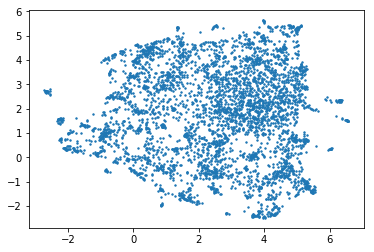

In [16]:
plt.scatter(X_umap[:,0], X_umap[:,1], s=2)

In [43]:
# Load gene sets
def _parse_gene_sets(gene_sets_f):
    gene_set_to_genes = {}
    with open(gene_sets_f, 'r') as f:
        for l in f:
            toks = l.split('\t')
            gene_set = toks[0]
            genes = [x.strip() for x in toks[2:]]
            gene_set_to_genes[gene_set] = genes
    return gene_set_to_genes
gene_to_gene_sets = _parse_gene_sets('./gene_sets/h.all.v7.1.symbols.gmt')
gene_to_gene_sets = {k:set(v) for k,v in gene_to_gene_sets.items()}

# Function for indexing the color of each gene for
# a given gene set
def _color_indices(gene_set, genes, gene_set_to_genes):
    col_inds = []
    for gene in genes:
        if gene in gene_set_to_genes[gene_set]:
            col_inds.append(1)
        else:
            col_inds.append(0)
    return col_inds

def _scatterplot_color_by_gene_set(gene_set, genes, gene_to_gene_sets, ax=None):
    ax.scatter(
        X_umap[:,0], 
        X_umap[:,1], 
        s=2, 
        c=[    
            sns.color_palette()[ci]
            for ci in _color_indices(
                gene_set,
                df.index,
                gene_to_gene_sets
            ) 
        ]
        #ax=ax
    )
    ax.set_title(gene_set)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_xticks([])
    ax.set_yticks([])

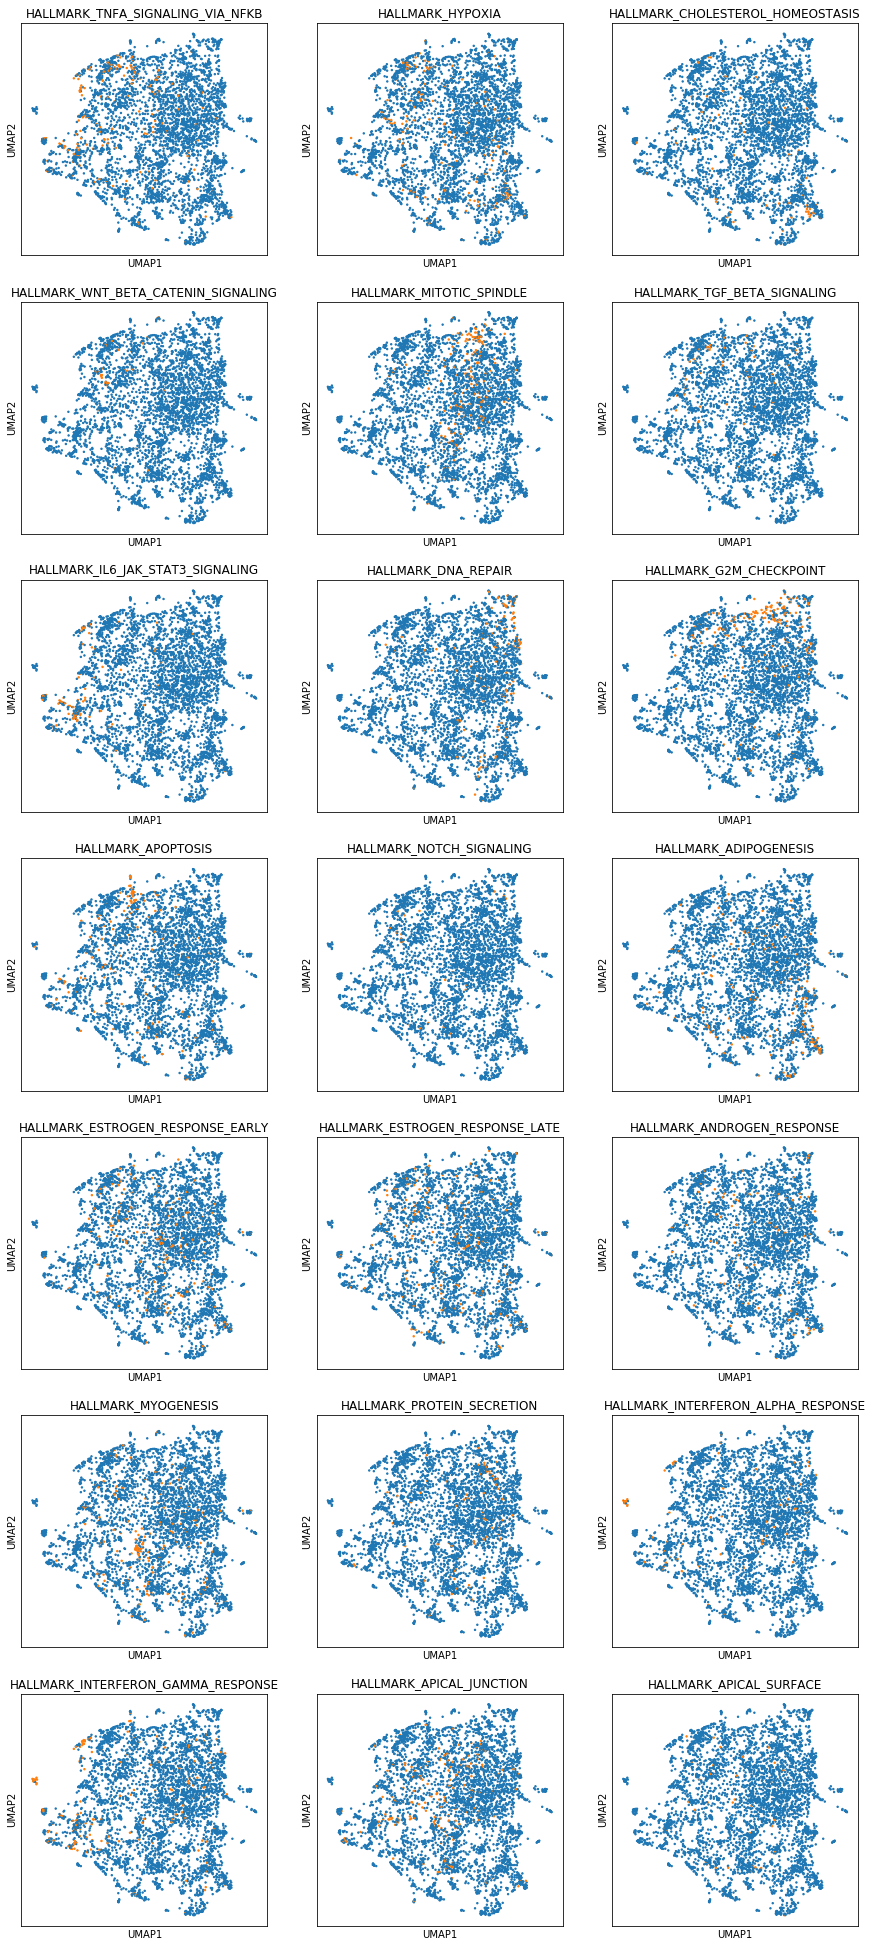

In [56]:
gene_set_grid = [
    ['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS'],
    ['HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_TGF_BETA_SIGNALING'],
    ['HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR', 'HALLMARK_G2M_CHECKPOINT'],
    ['HALLMARK_APOPTOSIS', 'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS'],
    ['HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ANDROGEN_RESPONSE'],
    ['HALLMARK_MYOGENESIS', 'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE'],
    ['HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE']
]

figure, axarr = plt.subplots(
    len(gene_set_grid), 
    len(gene_set_grid[0]),
    figsize = (
        5*len(gene_set_grid[0]),
        5*len(gene_set_grid)
    )
)

for r_i, ax_row in enumerate(axarr):
    for c_i, ax in enumerate(ax_row):
        gene_set = gene_set_grid[r_i][c_i]
        _scatterplot_color_by_gene_set(
            gene_set,
            df.index,
            gene_to_gene_sets,
            ax=ax
        )

figure.savefig('hallmark_umap_plots.png', format='png', dpi=150)